# **강병우님은 게임회사의 데이터 팀에 합류했습니다.**   
# **"다음 분기에 어떤게임을 설계해야 할까" 라는 고민을 해결하기 위해,**   
# **기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.**

**데이터불러오기**

In [1]:
from google.colab import files
uploaded = files.upload() #내드라이브에 csv파일 불러오기

Saving vgames2.csv to vgames2 (1).csv


In [2]:
# https://www.kaggle.com/datasets/gregorut/videogamesales 해당관련 Video Games 사이트
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['vgames2.csv'])) #data.csv불러오기
df = df.drop('Unnamed: 0', axis = 1)

**전처리(Pre-Processing)**

In [3]:
df.head(3)#sales 단위가 M확인!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


In [4]:
df.info() # 각 열의 Dtype정보 NA,EU,JP,Other object type확인!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
df.shape ##총 16598행, 10열

(16598, 9)

In [6]:
df.isnull().sum() #결측치 확인!

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df = df.dropna() #결측치행 제거!
df.isnull().sum()
df = df.drop(df[df['Publisher'] == 'Unknown'].index, axis = 0) # Publisher 203개 'Unknown' 제거

In [8]:
df.head(11) #value에 K의 단위, M의 문자 noisy, inconsistency발견!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [9]:
#K제거및 M단위 변환, M문자 제거
def rm_m(x):
  return x.replace("M","")
def rm_k(x):
    if 'K' in x:
      x = float(x.replace("K","")) * 0.001
    return x

df.NA_Sales = df.NA_Sales.apply(rm_m)
df.EU_Sales = df.EU_Sales.apply(rm_m)
df.JP_Sales = df.JP_Sales.apply(rm_m)
df.Other_Sales = df.Other_Sales.apply(rm_m)
df.NA_Sales = df.NA_Sales.apply(rm_k)
df.EU_Sales = df.EU_Sales.apply(rm_k)
df.JP_Sales = df.JP_Sales.apply(rm_k)
df.Other_Sales = df.Other_Sales.apply(rm_k)

In [10]:
df.head(11) #제거확인!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [11]:
#Year 소숫점 제거, 단위가 너무 작으므로 Sales단위 M단위 -> K단위로 변경
df.loc[:,'Year'] = df.loc[:,'Year'].astype('int64')
df.loc[:,'NA_Sales':'Other_Sales'] = df.loc[:,'NA_Sales':'Other_Sales'].astype('float')
df.loc[:,'NA_Sales':'Other_Sales'] = df.loc[:,'NA_Sales':'Other_Sales'] * 1000

In [12]:
 #index 재정렬
df = df.reset_index()
df = df.drop('index', axis = 1)

In [13]:
df.head(3) #전처리(Preprocessing)데이터 확인!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0


**EDA**

**1번. 지역에 따라서 선호하는 게임장르가 다를까?**

NA: 북미  
EU: 유럽  
JP: 일본  
Other: 그외 타지역

Action: 일정한 스토리/배경에 따라 실시간으로 캐릭터의 행동을 버튼등을 통해 직접 조작하는 게임    
Adventure: 모험을 펼치는 게임  
Misc: 멀티게임   
Platform : 게임에(발판)이 등장, 이 플랫폼은 언덕, 층계 등을 포함, 점프요소가 특징있는 게임  
Sports: 스포츠게임  
Simulation: 시뮬레이션 게임, 현실과 비슷한 환경을 구현해 간접 체험을 누릴수있는 게임    
Racing: 자동차 레이싱게임  
Role-Playing : RPG게임  
Puzzle: 퍼즐맞추기게임   
Strategy: 전략게임  
Fighting: 싸우는게임  
Shooter: 총쏘는게임

In [14]:
import pandas as pd

# 4개의 지역의 correlation, 일본에 비해 나머지 세개의 지역은 상관계수가 높아보임!
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.768968,0.449517,0.634657
EU_Sales,0.768968,1.000000,0.432373,0.727964
JP_Sales,0.449517,0.432373,1.000000,0.285311
Other_Sales,0.634657,0.727964,0.285311,1.000000


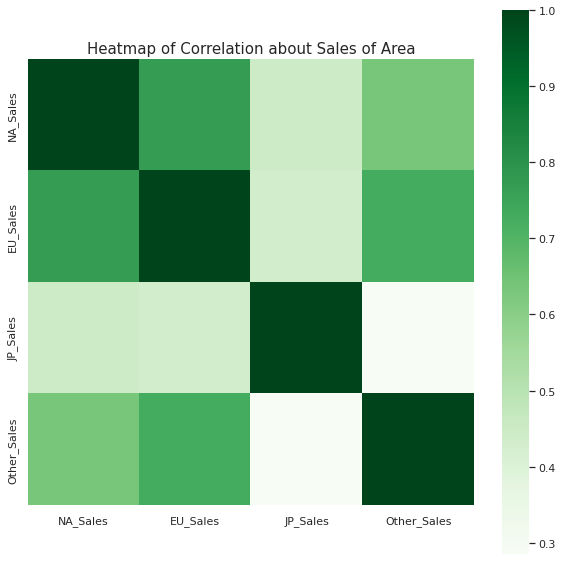

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr(), square = True, cmap="Greens");
plt.title('Heatmap of Correlation about Sales of Area', fontsize=15)
plt.show()

In [16]:
# 4개의 지역의 평균, 표준편차등등 및 정보
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16142.000000,16142.000000,16142.000000,16142.000000
mean,266.476893,148.052905,78.557180,48.468591
std,824.724593,509.738706,310.062847,190.213759
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


In [17]:
# 각 지역별 총매출량
# NA 총 매출량
df.groupby('Genre').NA_Sales.sum().nlargest() #북미는 Action, Sport, Shooter

Genre
Action      857490.0
Sports      666370.0
Shooter     574270.0
Platform    445280.0
Misc        393640.0
Name: NA_Sales, dtype: float64

In [18]:
# 유럽 총 매출량
df.groupby('Genre').EU_Sales.sum().nlargest() #유럽은 Shooterm, Platform, Racing

Genre
Action     513040.0
Sports     370900.0
Shooter    310200.0
Racing     233900.0
Misc       207430.0
Name: EU_Sales, dtype: float64

In [19]:
#일본 총 매출량
df.groupby('Genre').JP_Sales.sum().nlargest() #일본은 Role-Playing, Action, Sport

Genre
Role-Playing    341590.0
Action          155620.0
Sports          134760.0
Platform        130530.0
Misc            104090.0
Name: JP_Sales, dtype: float64

In [20]:
df.groupby('Genre').Other_Sales.sum().nlargest() # 다른지역은 Action, Sport, Shooter

Genre
Action     183920.0
Sports     132220.0
Shooter    101850.0
Racing      76170.0
Misc        72470.0
Name: Other_Sales, dtype: float64

In [21]:
df.groupby('Genre').NA_Sales.mean().nlargest() #NA평균 출고량

Genre
Platform    512.995392
Shooter     449.702428
Racing      291.628289
Sports      290.737347
Action      266.053366
Name: NA_Sales, dtype: float64

**Data Manipulation**

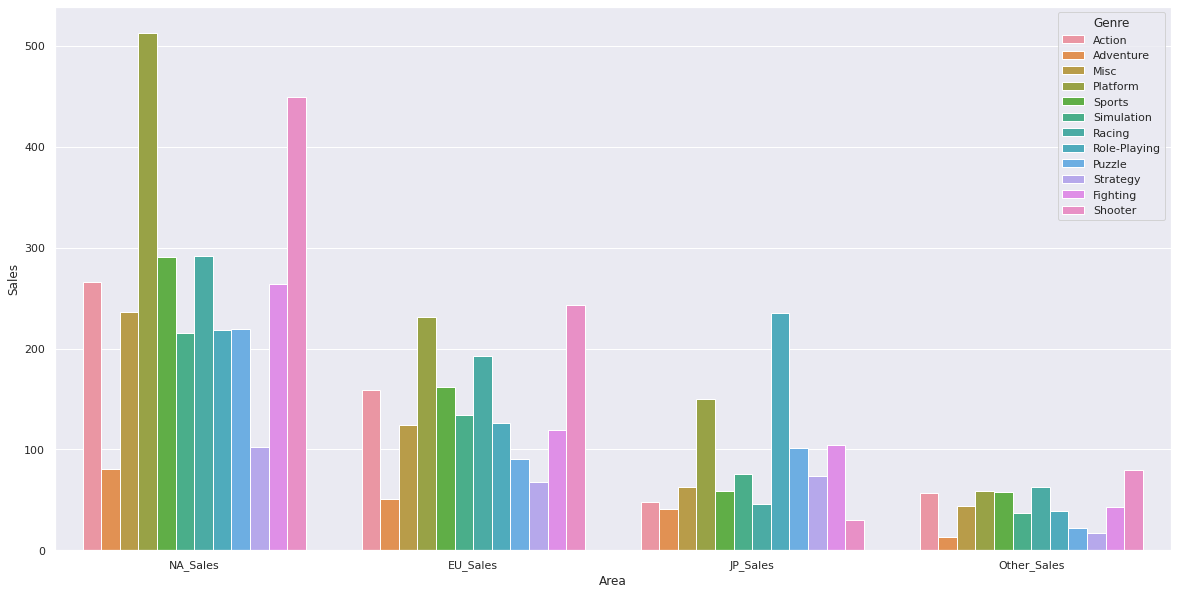

In [22]:
import seaborn as sns


df_Sales = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
tidy_Sales = df_Sales.melt(id_vars = 'Genre', value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
tidy_Sales = tidy_Sales.rename(
    columns = {
        'Genre' : 'Genre',
        'variable' : 'Area',
        'value' : 'Sales'
    }
)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'Area', y = 'Sales', hue = 'Genre', data = tidy_Sales, ci = None);


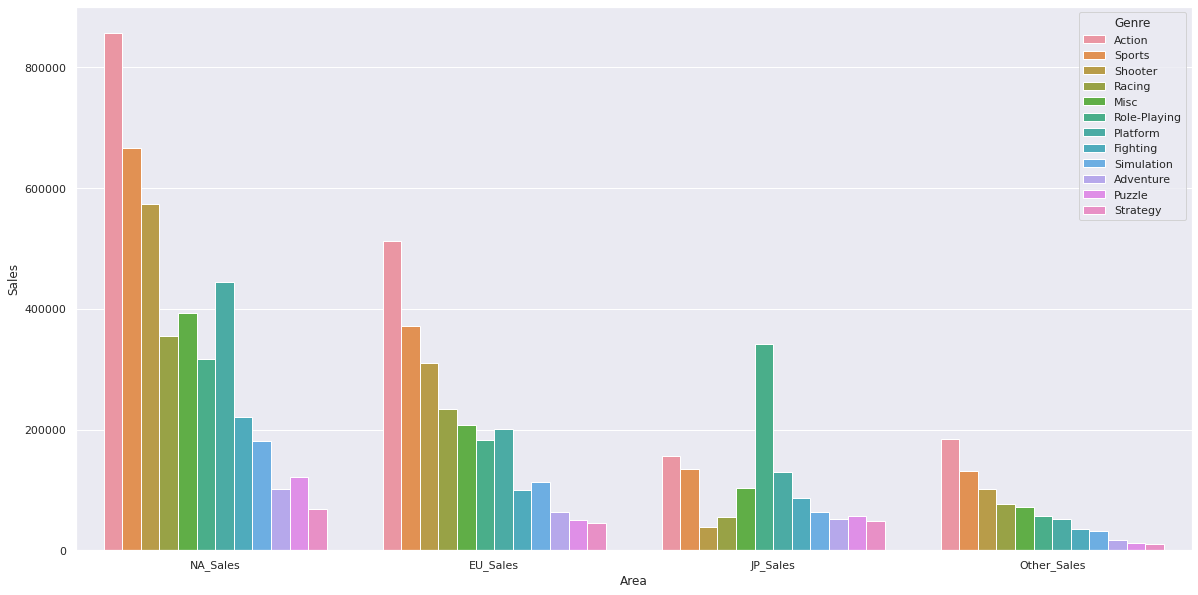

In [23]:
tidy_Sales_total = tidy_Sales.groupby(['Area', 'Genre'])[['Sales']].sum().sort_values(by = ['Area','Sales'], ascending = False)
tidy_Sales_total = tidy_Sales_total.reset_index()
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'Area', y = 'Sales', hue = 'Genre', data = tidy_Sales_total, ci = None, order = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']);

In [24]:
# 지역별 장르 선호하는것을 봤는데 NA는 Platform JP는 Role Playing EU와 Other은 Shooting. 
# 문화가 비슷한 북미와 유럽와 그외 지역은 가장 선호하는 게임은 Action 문화가 다른 JP은 Role-Playing 정말 차이가있을까?

import numpy as np

NA_Action = df.NA_Sales[df['Genre'] == 'Action']
NA_Platform = df.NA_Sales[df['Genre'] == 'Platform']
NA_Role_Playing =df.NA_Sales[df['Genre'] == 'Role-Playing']
NA_Shooter = df.NA_Sales[df['Genre'] == 'Shooter']

EU_Action = df.EU_Sales[df['Genre'] == 'Action']
EU_Platform = df.EU_Sales[df['Genre'] == 'Platform']
EU_Role_Playing = df.EU_Sales[df['Genre'] == 'Role-Playing']
EU_Shooter = df.EU_Sales[df['Genre'] == 'Shooter']

JP_Action = df.JP_Sales[df['Genre'] == 'Action']
JP_Platform = df.JP_Sales[df['Genre'] == 'Platform']
JP_Role_Playing = df.JP_Sales[df['Genre'] == 'Role-Playing']
JP_Shooter = df.JP_Sales[df['Genre'] == 'Shooter']

Other_Action = df.Other_Sales[df['Genre'] == 'Action']
Other_Platform = df.Other_Sales[df['Genre'] == 'Platform']
Other_Role_Playing = df.Other_Sales[df['Genre'] == 'Role-Playing']
Other_Shooter = df.Other_Sales[df['Genre'] == 'Shooter']


len(NA_Platform), len(NA_Role_Playing), len(NA_Shooter), len(NA_Action),len(EU_Platform), len(EU_Role_Playing), len(EU_Shooter), len(EU_Action)

(868, 1452, 1277, 3223, 868, 1452, 1277, 3223)

In [25]:
NA_RP_sample = np.random.choice(NA_Role_Playing, size = len(NA_Platform), replace = False)
EU_RP_sample = np.random.choice(EU_Role_Playing, size = len(EU_Platform), replace = False)
JP_RP_sample = np.random.choice(JP_Role_Playing, size = len(JP_Platform), replace = False)

In [26]:
NA_AT_sample = np.random.choice(NA_Action, size = len(NA_Role_Playing), replace = False)
EU_AT_sample = np.random.choice(EU_Action, size = len(EU_Role_Playing), replace = False)
JP_AT_sample = np.random.choice(JP_Action, size = len(JP_Role_Playing), replace = False)

In [27]:
NA_RS_sample =  np.random.choice(NA_Role_Playing, size = len(NA_Shooter), replace = False)
EU_RS_sample =  np.random.choice(EU_Role_Playing, size = len(EU_Shooter), replace = False)
JP_RS_sample =  np.random.choice(JP_Role_Playing, size = len(JP_Shooter), replace = False)

In [28]:
#뽑은 샘플 신뢰구간

from scipy import stats

def confidence_interval(data, confidence = 0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)

  # std/sqrt(n)
  stderr = stats.sem(data)

  #length of one interval
  interval = stderr * stats.t.ppf((1 + confidence) / 2, n-1) #ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)

CI_NA_RP = confidence_interval(NA_RP_sample, confidence = 0.95)
CI_EU_RP = confidence_interval(EU_RP_sample, confidence = 0.95)
CI_JP_RP = confidence_interval(JP_RP_sample, confidence = 0.95)

CI_NA_RP, CI_EU_RP, CI_JP_RP

((236.08294930875576, 185.54319054394927, 286.62270807356225),
 (128.00691244239633, 93.59720791670713, 162.41661696808552),
 (229.86175115207374, 189.03713609660747, 270.68636620754))

In [29]:
!pip install scipy --upgrade

In [30]:
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm

# Platform, Role_Playing, Shooter 각각 4개의 지역의 평균은 적어도 하나는 다르다.
F_statistic, pVal = stats.f_oneway(NA_Platform, EU_Platform, JP_Platform,Other_Platform)
print('Action 장르에 대한 각 지역별 데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.3f}'.format(F_statistic, pVal))
F_statistic, pVal = stats.f_oneway(NA_Role_Playing, EU_Role_Playing, JP_Role_Playing,Other_Role_Playing)
print('Role-Playing 장르에 대한 각 지역별 데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.3f}'.format(F_statistic, pVal))
F_statistic, pVal = stats.f_oneway(NA_Shooter, EU_Shooter, JP_Shooter,Other_Shooter)
print('Shooter 장르에 대한 각 지역별 데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.3f}'.format(F_statistic, pVal))

Action 장르에 대한 각 지역별 데이터의 일원분산분석 결과 : F=45.069, p=0.000
Role-Playing 장르에 대한 각 지역별 데이터의 일원분산분석 결과 : F=43.463, p=0.000
Shooter 장르에 대한 각 지역별 데이터의 일원분산분석 결과 : F=99.938, p=0.000


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


각 지역별 Platform, Role_Playing, Shooter게임의 평균 출고량은 적어도 하나는 다르다는 결과도출!

In [31]:
import numpy as np
from scipy import stats

# H_0 NA Action 평균 출고량은 NA Role_Playing의 평균 출고량수 보다 작거나 같다.
# H_1 NA Action 평균 출고량 NA Role_Playing의 평균 출고량수 보다 크다.

print(stats.ttest_ind(NA_AT_sample, NA_Role_Playing, alternative = 'greater')) # H_1 채택

# H_0 EU Action 평균 출고량은 EU Role_Playing의 평균 출고량수 보다 작거나 같다.
# H_1 EU Action 평균 출고량 EU Role_Playing의 평균 출고량수 보다 크다.

print(stats.ttest_ind(EU_AT_sample, EU_Role_Playing, alternative = 'greater')) # H_1 채택

# H_0 JP Role_Playing 평균 출고량은 JP Action의 평균 출고량수 보다 작거나 같다.
# H_1 JP Role_Playing 평균 출고량은 JP Action의 평균 출고량수 보다 크다.

print(stats.ttest_ind(JP_Role_Playing, JP_AT_sample, alternative = 'greater')) # H_1 채택

Ttest_indResult(statistic=1.7822516523160423, pvalue=0.03740636338692937)
Ttest_indResult(statistic=1.3006731745220987, pvalue=0.09673681065622079)
Ttest_indResult(statistic=10.960973908697618, pvalue=1.0073076651977188e-27)


In [32]:
# H_0 NA Platform 평균 출고량은 NA Role-Playing의 평균 출고량수 보다 작거나 같다.
# H_1 NA Platform 출고량 NA Role-Playing의 출고량수 보다 크다.

print(stats.ttest_ind(NA_Platform, NA_RP_sample,alternative = 'greater')) #H_1채택!

# H_0 EU Platform 평균 출고량은 EU Role-Playing의 평균 출고량수 보다 작거나 같다.
# H_1 EU Platform 평균 출고량 EU Role-Playing의 평균 출고량수 보다 크다.
print(stats.ttest_ind(EU_Platform, EU_RP_sample,alternative = 'greater')) #H_1채택!

# H_0 JP Role_Playing 평균 출고량은 JP Action의 평균 출고량수 보다 크거나 같다.
# H_1 JP Role_Playing 평균 출고량 JP Action의 평균 출고량수 보다 작다.
print(stats.ttest_ind(JP_Platform, JP_RP_sample,alternative = 'less')) #H_1채택!

Ttest_indResult(statistic=4.8121158768406325, pvalue=8.114502639171417e-07)
Ttest_indResult(statistic=3.852708216073276, pvalue=6.053548201866078e-05)
Ttest_indResult(statistic=-2.8895603434822847, pvalue=0.0019528761012039277)


In [33]:
# H_0 NA Shooter 평균 출고량은 NA Role-Playing의 평균 출고량수 보다 작거나 같다.
# H_1 NA Shooter 평균 출고량 NA Role-Playing의 평균 출고량수 보다 크다.

print(stats.ttest_ind(NA_Shooter, NA_RS_sample, alternative = 'greater')) #H_1채택!

# H_0 EU Shooter 평균 출고량은 EU Role-Playing의 평균 출고량수 보다 작거나 같다.
# H_1 EU Shooter 평균 출고량 EU Role-Playing의 평균 출고량수 보다 크다.

print(stats.ttest_ind(EU_Shooter, EU_RS_sample, alternative = 'greater')) #H_1채택!

# H_0 JP Shooter 평균 출고량은 JP Role-Playing의 평균 출고량수 보다 크거나 같다.
# H_1 JP Shooter 평균 출고량 JP Role-Playing의 평균 출고량수 보다 작다.

print(stats.ttest_ind(JP_Shooter, JP_RS_sample, alternative = 'less'))# H_1채택!

Ttest_indResult(statistic=6.0116825087069214, pvalue=1.0493704544804337e-09)
Ttest_indResult(statistic=5.379952502891156, pvalue=4.0639504418035594e-08)
Ttest_indResult(statistic=-11.115161329915752, pvalue=2.307224423808536e-28)


**북미, 유럽은 Platform, Shooter, Action장르를 선호하는 반면 일본은 Role-Playing장르를 더 선호하는것으로 보입니다.**

# **2번. 연도별 게임의 트랜드가 있을까?**

**Feature Engineering & 데이터 전처리(Pre-Processing)**

In [34]:
#Feature Engineering 및 데이터 전처리 0~50 -> + 2000 , 50~99 -> + 1900
#각 장르별 판매량 총합 
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
def year(x):
  if (x > 50) & (x < 100):
    x = 1900 + x
  elif (x < 50) & (x >= 0):
    x = 2000 + x
  return x

df['Year'] = df.Year.apply(year)
df.head(3) # Year 단위 통일 확인!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0


In [35]:
# 1980~ 1989년대 : 80s, 1990~1999년대 : 90s, 2000~2009 : 00s, 2010~2020 : 10s
df.groupby('Year').Genre.count()

def year_interval(x):
  if (x >= 1980) & (x < 1990):
    x = '80s'
  elif (x >= 1990) & (x < 2000):
    x = '90s'
  elif (x >= 2000) & (x < 2010):
    x = '00s'
  elif (x >= 2010) & (x <= 2020):
    x = '10s'
  return x
df['Year_Interval'] = df['Year'].apply(year_interval) 

In [36]:
df.head(3) #연도 구간별 확인!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_Interval
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0,00s
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0,00s
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,10s


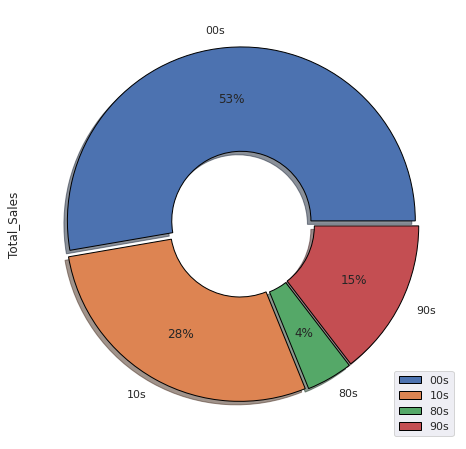

In [37]:
import matplotlib.pyplot as plt

# 연도 구간별 총 출고량 비율% pie plot
sns.set(rc={'figure.figsize':(15,8)})
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
Year_df = df.groupby(['Year_Interval','Genre'])[['Total_Sales']].sum().sort_values(by = ['Year_Interval', 'Total_Sales'], ascending = False)
Year_df.groupby(['Year_Interval']).sum().plot(kind = 'pie', y = 'Total_Sales', autopct = '%1.0f%%', shadow = True, explode = [0.02,0.02,0.02,0.02],
                                              wedgeprops = wedgeprops, pctdistance=0.7);

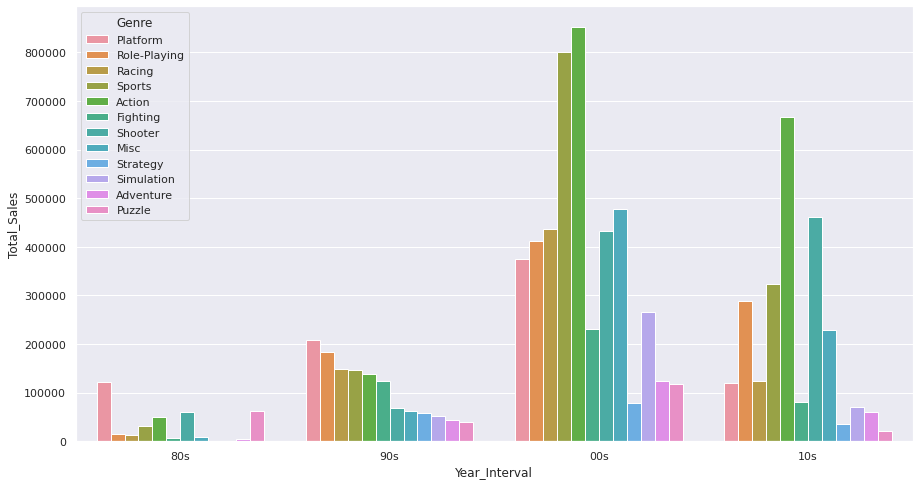

In [38]:
#연도 구간마다 장르별 총출고량 bar plot
year_order = ['80s', '90s', '00s', '10s']
Year_df = df.groupby(['Year_Interval','Genre'])[['Total_Sales']].sum().sort_values(by = ['Year_Interval', 'Total_Sales'], ascending = False)
Year_df = Year_df.reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x = Year_df['Year_Interval'], y = Year_df['Total_Sales'],hue = Year_df['Genre'], data = Year_df, order = year_order);

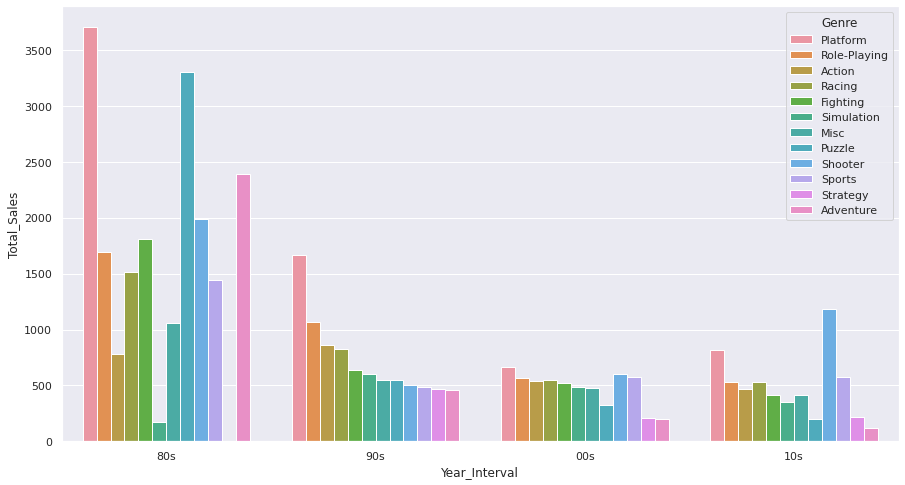

In [39]:
#연도 구간마다 장르별 평균 출고량 bar plot

Year_df1 = df.groupby(['Year_Interval','Genre'])[['Total_Sales']].mean().sort_values(by = ['Year_Interval', 'Total_Sales'], ascending = False)
Year_df1 = Year_df1.reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x = Year_df1['Year_Interval'], y = Year_df1['Total_Sales'],hue = Year_df1['Genre'], data = Year_df1, order = year_order);

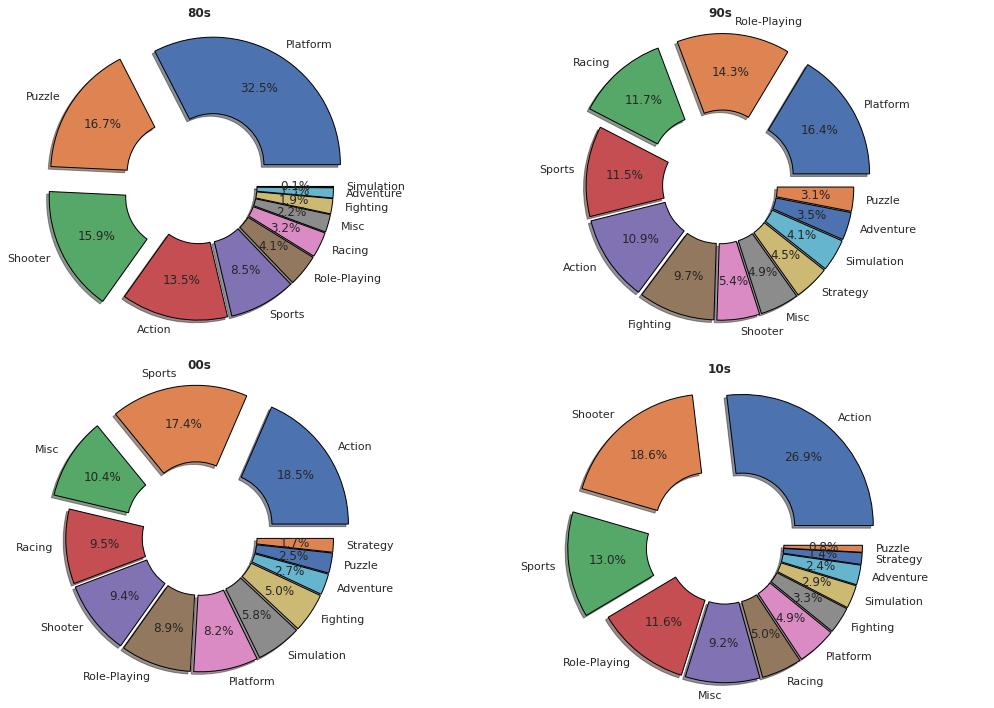

In [40]:
import matplotlib.pyplot as plt

# 연도 구간별 총 출고량 비율% pie plot
Year_df
#f, ax = plt.subplots(1,4)

sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(2, 2, 1)
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'} 
plt.pie(Year_df[Year_df['Year_Interval'] == '80s'].Total_Sales, 
        labels = Year_df['Genre'][12:23].to_list() , 
        autopct = '%0.1f%%', explode = (0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        wedgeprops = wedgeprops, pctdistance=0.7, shadow = True)
plt.title('80s',fontweight="bold", pad = 10)

plt.subplot(2, 2, 2) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'} 
plt.pie(Year_df[Year_df['Year_Interval'] == '90s'].Total_Sales, 
        labels = Year_df['Genre'][0:12].to_list() , 
        autopct = '%0.1f%%', explode = (0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        wedgeprops = wedgeprops, pctdistance=0.7, shadow = True)
plt.title('90s',fontweight="bold", pad = 10)

plt.subplot(2, 2, 3) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'} 
plt.pie(Year_df[Year_df['Year_Interval'] == '00s'].Total_Sales, 
        labels = Year_df['Genre'][35:47].to_list() , 
        autopct = '%0.1f%%', explode = (0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        wedgeprops = wedgeprops, pctdistance=0.7, shadow = True)
plt.title('00s',fontweight="bold",pad = 10)

plt.subplot(2, 2, 4) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'} 
plt.pie(Year_df[Year_df['Year_Interval'] == '10s'].Total_Sales, 
        labels = Year_df['Genre'][23:35].to_list() , 
        autopct = '%0.1f%%', explode = (0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        wedgeprops = wedgeprops, pctdistance=0.7, shadow = True)
plt.title('10s',fontweight="bold")
plt.axis('equal')

plt.tight_layout()
plt.show()


In [41]:
Sports_00s = df.Total_Sales[(df['Year_Interval'] == '00s') & (df['Genre'] == 'Sports')]
Shooter_00s = df.Total_Sales[(df['Year_Interval'] == '00s') & (df['Genre'] == 'Shooter')]
Sports_10s = df.Total_Sales[(df['Year_Interval'] == '10s') & (df['Genre'] == 'Sports')]
Shooter_10s = df.Total_Sales[(df['Year_Interval'] == '10s') & (df['Genre'] == 'Shooter')]
len(Sports_00s) , len(Shooter_00s), len(Sports_10s) , len(Shooter_10s) 

(1402, 718, 564, 392)

In [42]:
Sports_00s_sample = np.random.choice(Sports_00s, size = len(Shooter_00s), replace = False)
Sports_10s_sample = np.random.choice(Sports_10s, size = len(Shooter_10s), replace = False)

In [43]:
CI_Shooter_00s = confidence_interval(Sports_00s_sample, confidence = 0.95)
CI_Shooter_10s = confidence_interval(Sports_10s_sample, confidence = 0.95)
CI_Shooter_00s, CI_Shooter_10s

((570.9888579387186, 333.6329861348187, 808.3447297426186),
 (587.295918367347, 482.64772004596745, 691.9441166887266))

In [44]:
# H_0 평균 1990년대 Platform 평균 출고량은 1990년대 Shooter 평균 출고량 수 보다 작거나 같다.
# H_1 평균 1990년대 Platform 평균 출고량은 1990년대 Shooter 평균 출고량 수 보다 크다.

print(np.mean(Sports_00s_sample))
print(np.mean(Shooter_00s))
print(stats.ttest_ind(Sports_00s_sample, Shooter_00s, alternative = 'less')) #대립가설 채택

570.9888579387186
603.690807799443
Ttest_indResult(statistic=-0.2514487302856253, pvalue=0.4007516120009834)


In [70]:
# H_0 평균 2010년대 Sports 평균 출고량은 2010년대 Shooter 평균 출고량수 보다 크거나 같다.
# H_1 평균 2010년대 Sports 평균 출고량 2010년대 Shooter 평균 출고량수 보다 작다.

print(np.mean(Sports_10s_sample))
print(np.mean(Shooter_10s))
print(stats.ttest_ind(Sports_10s_sample, Shooter_10s, alternative = 'less')) #대립가설 채택

587.295918367347
1179.5663265306123
Ttest_indResult(statistic=4.60001487288728, pvalue=2.4633207358856383e-06)


# **3번. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [46]:
#게임 wi만 너무 큼 확인!
#최근 뉴스 플스 4다 잡아먹음

df.groupby('Platform').Total_Sales.mean().nlargest()

Platform
GB      2622.989691
NES     2561.734694
GEN     1050.000000
SNES     836.987448
PS4      825.449102
Name: Total_Sales, dtype: float64

In [47]:
#2010년-2020년 데이터만 따로 저장
df_10s = df[df['Year_Interval'] == '10s']
df_10s = df_10s.reset_index()
df_10s = df_10s.iloc[:,1:]
df_10s.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_Interval
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,10s
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0,10s
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0,10s


In [48]:
#탑 10 총 출고량 저장
Name_df = df_10s.groupby(['Name'])[['Total_Sales']].sum().sort_values(by = ['Total_Sales'], ascending = False)
Name_df = Name_df[0:10] # top 10개 게임만 저장
Name_df = Name_df.reset_index()
Name_df 

,Name,Total_Sales
0,Grand Theft Auto V,55920.0
1,Call of Duty: Modern Warfare 3,30840.0
2,Call of Duty: Black Ops II,29730.0
3,Call of Duty: Black Ops,29410.0
4,Call of Duty: Ghosts,27370.0
5,Call of Duty: Black Ops 3,25300.0
6,Minecraft,23750.0
7,Call of Duty: Advanced Warfare,21890.0
8,Kinect Adventures!,21820.0
9,The Elder Scrolls V: Skyrim,19280.0


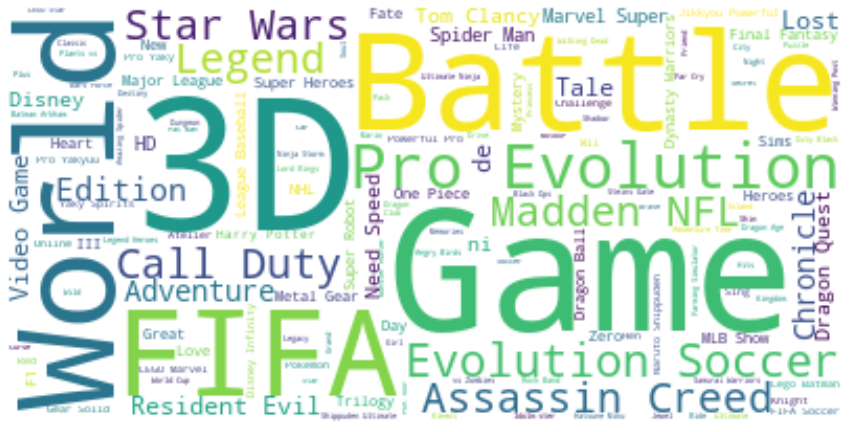

In [71]:
# 10년대이후 게임이름 빈도수 체크!
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

text = " ".join(i for i in df_10s.Name) 

NGwords = ['II', 'DS', 'Portable', 'Party', 'Dance', 'Collection']
stopwords = set(STOPWORDS)
for NGword in NGwords:
    stopwords.add(NGword)
wordcloud = WordCloud(stopwords = stopwords, background_color="White").generate(text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

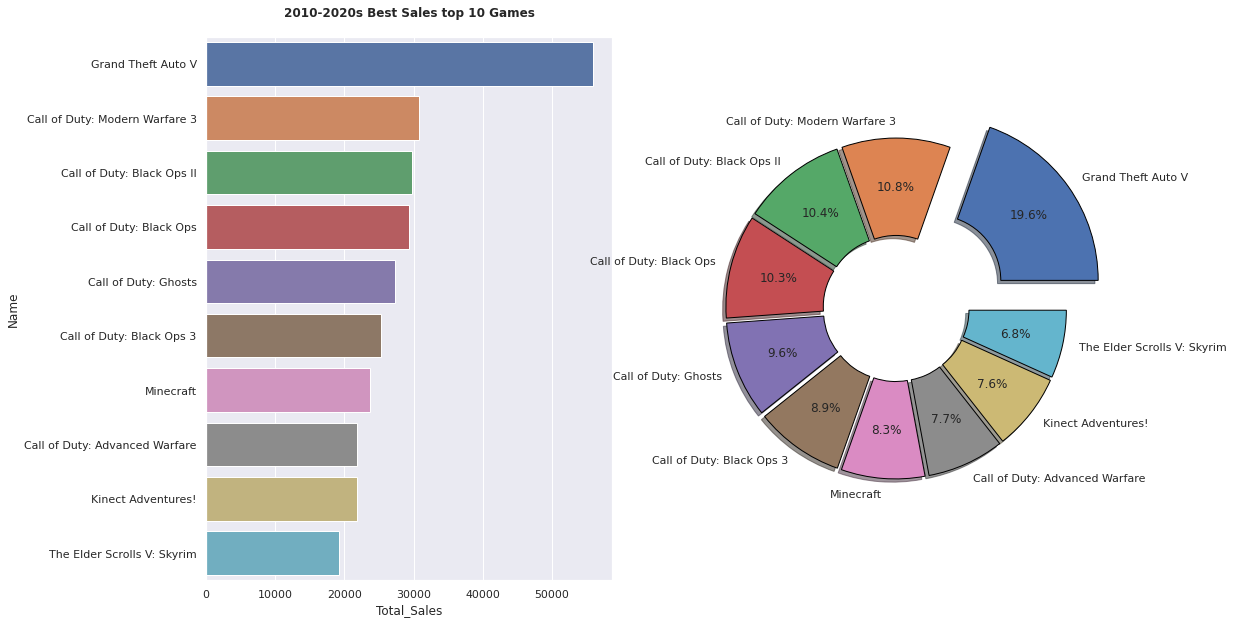

In [49]:
import seaborn as sns

#2010~2020년대 탑 10 게임 출고량 bar plot 및 pie chart plot
sns.set(rc={'figure.figsize':(16,10)})
plt.subplot(1, 2, 1)
sns.barplot(x = 'Total_Sales', y ='Name',data = Name_df)
plt.title('2010-2020s Best Sales top 10 Games',fontweight="bold", pad = 20);

sns.set(rc={'figure.figsize':(12,12)})
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'} 
plt.subplot(1, 2, 2)
plt.pie(Name_df.Total_Sales, 
        autopct = '%0.1f%%', labels = Name_df.Name.to_list()[:],explode = (0.3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        wedgeprops = wedgeprops, pctdistance=0.7, shadow = True);

In [50]:
df_agg1 = df_10s.groupby(['Platform']).Total_Sales.mean().nlargest(100)
platform_order = df_agg1.sort_values(ascending = False).index
df_agg2 = df_10s.groupby(['Platform']).Total_Sales.sum().nlargest(100)
platform_order2 = df_agg2.sort_values(ascending = False).index

In [51]:
Platform_df = df_10s.groupby(['Platform'])[['Total_Sales']].mean().sort_values(by = ['Total_Sales'], ascending = False)
Platform_df = Platform_df.reset_index()
Platform_df2 = df_10s.groupby(['Platform'])[['Total_Sales']].sum().sort_values(by = ['Total_Sales'], ascending = False)
Platform_df2 = Platform_df2.reset_index()

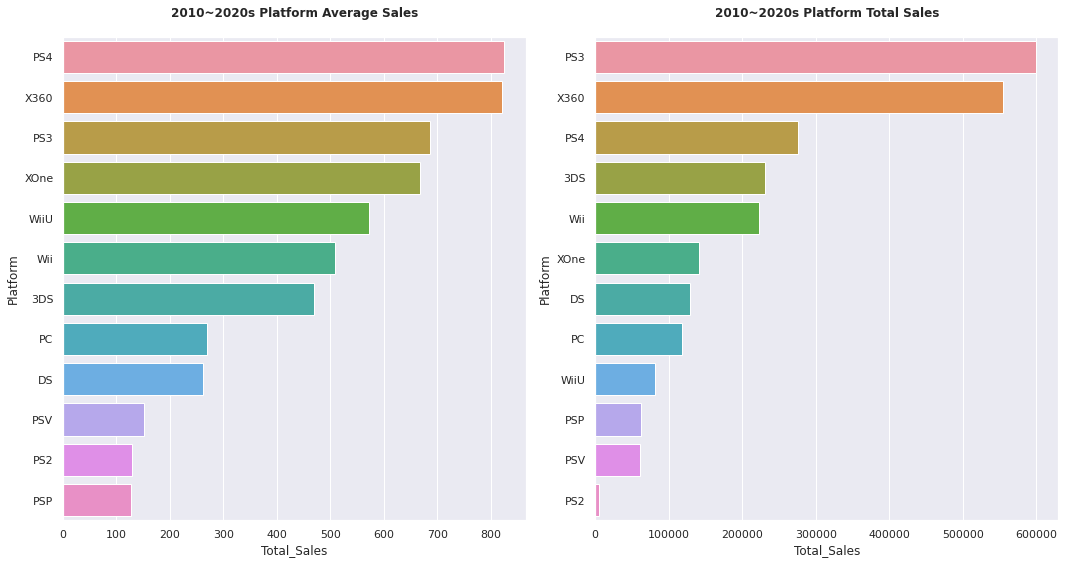

In [52]:
sns.set(rc={'figure.figsize':(15,8)})
plt.subplot(1, 2, 1)
sns.barplot(x = Platform_df['Total_Sales'], y = Platform_df['Platform'], data = Platform_df, order = platform_order, ci = None)
plt.title('2010~2020s Platform Average Sales',fontweight="bold", pad = 20);
plt.subplot(1, 2, 2)
sns.barplot(x = Platform_df2['Total_Sales'], y = Platform_df2['Platform'], data = Platform_df2, order = platform_order2) 
plt.title('2010~2020s Platform Total Sales',fontweight="bold", pad = 20);
sns.set(rc={'figure.figsize':(15,8)})
plt.tight_layout()

In [53]:
PS2 = df.Total_Sales[df['Platform'] == 'PS2']
X360 = df.Total_Sales[df['Platform'] == 'X360']
PC = df.Total_Sales[df['Platform'] == 'PC']
len(PS2), len(X360)

(2118, 1227)

In [54]:
PS2_sample = np.random.choice(PS2, size = len(PC), replace = False)

In [55]:
CI_PS2 = confidence_interval(PS2_sample, confidence = 0.95)
CI_PS2

(601.6684841875682, 530.0863038011532, 673.2506645739832)

In [56]:
# H_0 평균 PS2 총 출고량은 PC 출고량 보다 작거나 같다.
# H_1 평균 Platform 총 출고량은 PC 출고량 보다 크다.

print(np.mean(PS2_sample))
print(np.mean(PC))
print(stats.ttest_ind(PS2_sample, PC, alternative = 'greater')) #대립가설 채택

601.6684841875682
274.3620501635769
Ttest_indResult(statistic=7.597531053866157, pvalue=2.3924029713271418e-14)


# **4번. 다음분기에 북미에서 어느 플렛폼에 어떤 장르로 출시하면 좋을까?**    

In [57]:
# 북미 총출고량 top 5 Platform만 따로뽑아서 각 장르별 출고량 분석
import matplotlib.pyplot as plt

df_plat = df.groupby(['Platform'])[['NA_Sales']].sum().sort_values(by = ['NA_Sales'], ascending = False).index[:5]
df_Plat_five = pd.concat([df[df['Platform'] == df_plat[0]], df[df['Platform'] == df_plat[1]],
             df[df['Platform'] == df_plat[2]], df[df['Platform'] == df_plat[3]],
             df[df['Platform'] == df_plat[4]]])
df_Plat_five = df_Plat_five.reset_index()
df_Plat_five = df_Plat_five.drop('index', axis = 1)
df_Plat_five

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_Interval
0,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.0,10.0,0.0,0.0,10.0,10s
1,Project Sylpheed: Arc of Deception,X360,2006,Shooter,Microsoft Game Studios,120.0,10.0,20.0,10.0,160.0,00s
2,Crysis 3,X360,2013,Shooter,Electronic Arts,510.0,330.0,10.0,80.0,930.0,10s
3,Dreamworks Madagascar Kartz,X360,2009,Racing,Activision,140.0,90.0,0.0,20.0,250.0,00s
4,Unreal Tournament III,X360,2008,Shooter,Midway Games,250.0,170.0,10.0,50.0,480.0,00s
...,...,...,...,...,...,...,...,...,...,...,...
8006,Way of the Samurai 3,PS3,2008,Action,Gamebridge,180.0,80.0,220.0,40.0,520.0,00s
8007,Yakuza,PS3,2012,Action,Sega,0.0,0.0,110.0,0.0,110.0,10s
8008,MindJack,PS3,2011,Shooter,Square Enix,70.0,80.0,0.0,30.0,180.0,10s
8009,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50.0,0.0,50.0,10s


In [58]:
df.groupby(['Platform'])[['NA_Sales']].sum().sort_values(by = ['NA_Sales'], ascending = False).head(5)

,NA_Sales
Platform,
X360,593160.0
PS2,567800.0
Wii,494730.0
DS,387420.0
PS3,387240.0


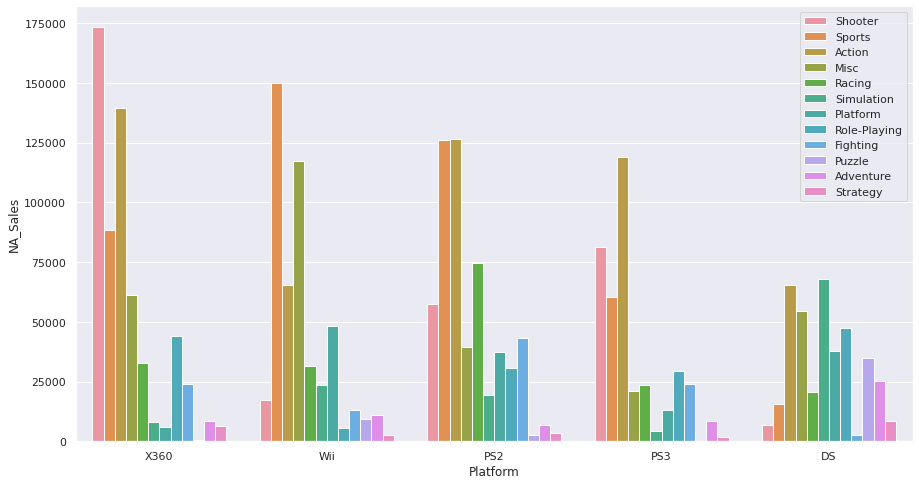

In [59]:
# 북미 총출고량 top 5 Platform안에 각 장르별 출고량 barplot
df_Plat_Genre_five = df_Plat_five.groupby(['Platform','Genre'])[['NA_Sales']].sum().sort_values(by = ['NA_Sales'], ascending = False)
df_Plat_Genre_five = df_Plat_Genre_five.reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x = df_Plat_Genre_five['Platform'], y = df_Plat_Genre_five['NA_Sales'], hue = df_Plat_Genre_five['Genre'],data = df_Plat_Genre_five);
plt.legend(loc = 'upper right');

In [60]:
df_Plat_Genre_five_sort = df_Plat_Genre_five.sort_values(['Platform', 'NA_Sales'], ascending = False)
df_Plat_Genre_five_sort = df_Plat_Genre_five_sort.reset_index()
df_Plat_Genre_five_sort = df_Plat_Genre_five_sort.iloc[:,1:]
df_Plat_Genre_five_sort.head(5)

,Platform,Genre,NA_Sales
0,X360,Shooter,173370.0
1,X360,Action,139620.0
2,X360,Sports,88440.0
3,X360,Misc,61160.0
4,X360,Role-Playing,44250.0


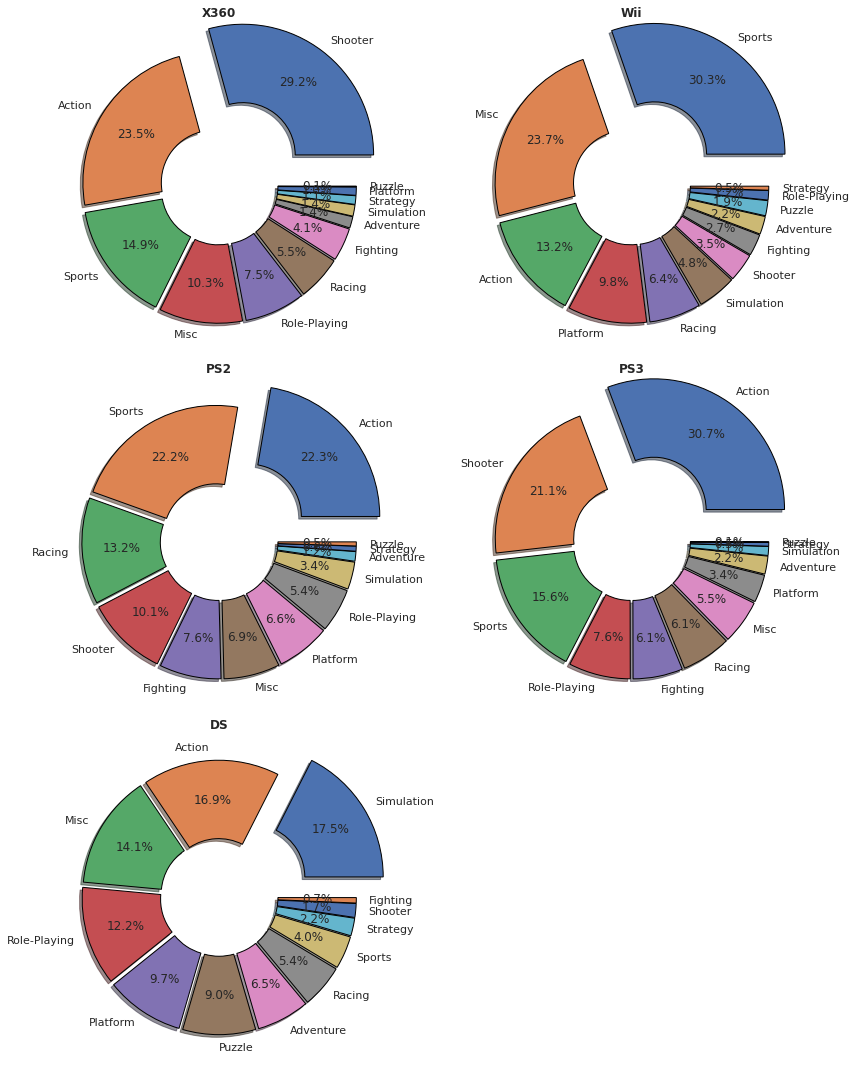

In [61]:
# 북미 총출고량 top 5 Platform안에 각 장르별 출고량 piechart plot
sns.set(rc={'figure.figsize':(12,15)})
plt.subplot(3,2, 1) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_Plat_Genre_five[df_Plat_Genre_five['Platform'] == 'X360'].NA_Sales, 
        labels = df_Plat_Genre_five_sort['Genre'][0:12].to_list() , 
        autopct = '%0.1f%%', explode = (0.3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True,
        wedgeprops = wedgeprops, pctdistance=0.7)
plt.title('X360',fontweight="bold")
plt.subplot(3, 2, 2) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_Plat_Genre_five[df_Plat_Genre_five['Platform'] == 'Wii'].NA_Sales, 
        labels = df_Plat_Genre_five_sort['Genre'][12:24].to_list() , 
        autopct = '%0.1f%%', explode = (0.3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True,
        wedgeprops = wedgeprops, pctdistance=0.7)
plt.title('Wii',fontweight="bold")
plt.subplot(3, 2, 3) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_Plat_Genre_five[df_Plat_Genre_five['Platform'] == 'PS2'].NA_Sales, 
        labels = df_Plat_Genre_five_sort['Genre'][36:48].to_list() , 
        autopct = '%0.1f%%', explode = (0.3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True,
        wedgeprops = wedgeprops, pctdistance=0.7)
plt.title('PS2',fontweight="bold")
plt.subplot(3, 2, 4) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_Plat_Genre_five[df_Plat_Genre_five['Platform'] == 'PS3'].NA_Sales, 
        labels = df_Plat_Genre_five_sort['Genre'][24:36].to_list() , 
        autopct = '%0.1f%%', explode = (0.3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True,
        wedgeprops = wedgeprops, pctdistance=0.7)
plt.title('PS3',fontweight="bold")
plt.subplot(3, 2, 5) 
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_Plat_Genre_five[df_Plat_Genre_five['Platform'] == 'DS'].NA_Sales, 
        labels = df_Plat_Genre_five_sort['Genre'][48:60].to_list() , 
        autopct = '%0.1f%%', explode = (0.3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True,
        wedgeprops = wedgeprops, pctdistance=0.7)
plt.title('DS',fontweight="bold")
plt.tight_layout()
plt.show()

In [62]:
X360_Shooter = df.Total_Sales[(df['Platform'] == 'X360') & (df['Genre'] == 'Shooter')]
X360_Action = df.Total_Sales[(df['Platform'] == 'X360') & (df['Genre'] == 'Action')]
X360_Action_sample = np.random.choice(X360_Action, size = len(X360_Shooter), replace = False)

print(np.mean(X360_Action_sample))
print(np.mean(X360_Shooter))
print(stats.ttest_ind(X360_Shooter, X360_Action_sample, alternative = 'greater')) #대립가설 채택

801.9289340101523
1406.802030456853
Ttest_indResult(statistic=2.6520422860578194, pvalue=0.004162704296382599)


# **결론**
**요약하자면, 게임 설계을 할때 출고량 데이터를 기반으로 결론을 내렸습니다. 출시타켓 지역으로 북미와 유럽, 최신 트랜드 게임장르로는 액션, Shooter, 시리즈물로는 스포츠와 Shooter, 플렛폼으로는 PS3, X360이 적절합니다. 이를 종합하여 지역중 출고량이 가장 높은것은 북미지역,북미에서 출고량이 가장높은 X360플렛폼, 북미내에 X360플렛폼에서 가장 출고량이 높은 Shooter장르 기반으로 전쟁과 관련된 시리즈 물로 제작하는 것을 추천합니다.**